In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, ConstantKernel,  ExpSineSquared

In [2]:
N =200
t_N = 10
t_0 = 1
t = np.linspace(t_0,t_N,N)

np.random.seed(42)
w_1 = 2 + np.abs(GaussianProcessRegressor(kernel=ConstantKernel(2) \
                                          * RBF(2)).sample_y(t[:, np.newaxis], 1).ravel())
w_3 = 7-(t-5)**2/5 + np.abs(GaussianProcessRegressor(kernel=ConstantKernel(1) \
                                                     * ExpSineSquared(0.1,10) \
                                                     * RBF(2)).sample_y(t[:, np.newaxis], 1).ravel())

w_2 = np.tile(10,N) ; w_4 = np.tile(2,N)
K = 4
w = np.concatenate([w_1,w_2,w_3,w_4])
data = np.c_[np.tile(t,K),w]
data.shape


(800, 2)

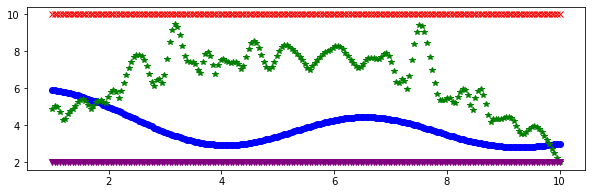

In [3]:
plt.figure(figsize=(10,3))
plt.plot(t, w_1,'o',color = 'b')
plt.plot(t, w_2,'x',color = 'r')
plt.plot(t, w_3,'*',color = 'g')
plt.plot(t, w_4,'v',color = 'purple')

In [12]:
from scipy.stats import gaussian_kde

kde_bdw = 0.1
kde = gaussian_kde(data.T,bw_method= kde_bdw)

def integrate_box_kde(a,b):
    return kde.integrate_box(a,b)
def evaluate_kde(mesh_positions):
    return kde.evaluate(mesh_positions)

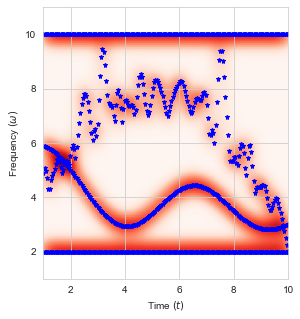

In [13]:
from RandomPartition import RandomPartition

partition = RandomPartition(data,4,5,integrate_box_kde,evaluate_kde)   
partition.plot_KDE((5,5))

In [6]:
partition.estimate_partition_CEM_trun_normal(n_sim = 100, maxiter_CE = 200, \
                                             tol_ce = 0.0001, sigma2_t = 0.01,sigma2_omega = 0.01,\
                                             parallel = True,sampler = 'parallel',init_method ='regular')

Initializing partition:  11:02:32
CEM started:  11:02:32
╔═══╦════════╦════════╦═══════╦═══════╦══════╦═════════╗
║ i ║ time   ║Gamma_k ║ minKL ║ maxKL ║ KL_i ║ rel_dif ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  0║11:02:32║ 0.239  ║ 0.199 ║ 0.300 ║ 0.255║ 4.582 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  1║11:02:32║ 0.231  ║ 0.205 ║ 0.319 ║ 0.243║ 3.729 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  2║11:02:33║ 0.218  ║ 0.181 ║ 0.303 ║ 0.234║ 4.513 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  3║11:02:33║ 0.205  ║ 0.174 ║ 0.285 ║ 0.224║ 4.962 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  4║11:02:34║ 0.202  ║ 0.170 ║ 0.256 ║ 0.213║ 4.000 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  5║11:02:34║ 0.193  ║ 0.174 ║ 0.261 ║ 0.204║ 3.888 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  6║11:02:35║ 0.182  ║ 0.159 ║ 0.232 ║ 0.196║ 4.688 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════

╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 72║11:03:08║ 0.083  ║ 0.082 ║ 0.092 ║ 0.082║ 0.003 ║
CEM ended:  11:03:08
Time:  0:00:36.443508


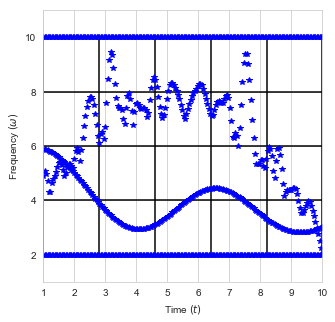

In [7]:
partition.plot_partition(partition.breaks_init, figsize = (5,5))

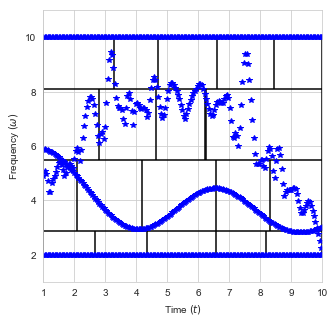

In [8]:
partition.plot_partition(partition.breaks_old, figsize = (5,5))

In [9]:
partition.animate_partition_fitting((5,5))

In [7]:
partition.estimate_partition_CEM_multinom(n_sim = 100, maxiter_CE = 200,tol_ce = 0.0001, 
                                          N_grid_omega = 5000, N_grid_t = 1000, tol_omega = 1, tol_t = 1,
                                          parallel = True,sampler = 'parallel',init_method ='regular')

Initializing partition:  14:07:00
CEM started:  14:07:00
╔═══╦════════╦════════╦═══════╦═══════╦══════╦═════════╗
║ i ║ time   ║Gamma_k ║ minKL ║ maxKL ║ KL_i ║ rel_dif ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  0║14:07:00║ 0.232  ║ 0.200 ║ 0.335 ║ 0.255║ 6.073 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  1║14:07:00║ 0.225  ║ 0.175 ║ 0.320 ║ 0.239║ 5.953 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  2║14:07:01║ 0.196  ║ 0.153 ║ 0.341 ║ 0.225║ 8.872 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  3║14:07:01║ 0.186  ║ 0.160 ║ 0.297 ║ 0.205║ 5.866 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  4║14:07:01║ 0.174  ║ 0.150 ║ 0.263 ║ 0.193║ 7.163 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  5║14:07:02║ 0.167  ║ 0.143 ║ 0.242 ║ 0.179║ 5.568 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║  6║14:07:02║ 0.156  ║ 0.133 ║ 0.258 ║ 0.169║ 6.472 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════

╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 72║14:07:32║ 0.080  ║ 0.078 ║ 0.099 ║ 0.080║ 0.307 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 73║14:07:33║ 0.080  ║ 0.079 ║ 0.093 ║ 0.080║ 0.163 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 74║14:07:33║ 0.080  ║ 0.079 ║ 0.090 ║ 0.079║ 0.162 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 75║14:07:34║ 0.080  ║ 0.078 ║ 0.101 ║ 0.079║ 0.335 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 76║14:07:34║ 0.080  ║ 0.078 ║ 0.091 ║ 0.079║ 0.313 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 77║14:07:35║ 0.080  ║ 0.078 ║ 0.087 ║ 0.079║ 0.238 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 78║14:07:35║ 0.080  ║ 0.078 ║ 0.095 ║ 0.079║ 0.208 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 79║14:07:36║ 0.079  ║ 0.078 ║ 0.096 ║ 0.078║ 0.229 ║
╠═══╬════════╬════════╬═══════╬═══════╬══════╬═════════╣
║ 80║14:07:36║ 0.079  ║ 0.077 ║ 0.094 ║ 0.078║ 

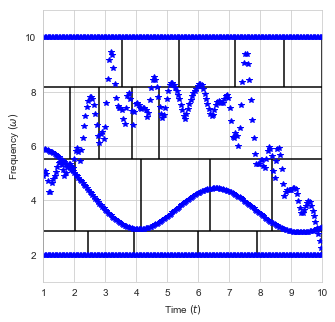

In [8]:
partition.animate_partition_fitting((5,5),save_plot = True, plotpath='plots/')
partition.plot_partition(partition.breaks_old, figsize = (5,5),save_plot = True,plotpath= 'plots/',plotname='partition_multinomial.png')